# Análisis Visual de 5 Años de Precios al consumidor en Chile

Este proyecto transforma más de 1.8 millones de registros públicos de la **Oficina de Estudios y Políticas Agrarias (ODEPA)** en un dashboard interactivo que analiza los precios al consumidor en Chile entre 2020 y 2025. El objetivo es identificar tendencias, patrones estacionales y disparidades geográficas en los precios de los alimentos de la canasta básica, culminando en una herramienta web que permite a cualquier ciudadano explorar estos datos de forma intuitiva.

---

## Proceso
El desarrollo de este proyecto se estructuró en cuatro fases principales, desde la recolección de los datos hasta el despliegue de la aplicación web.

#### 1. Consolidación y Limpieza de Datos (ETL)
Se unificaron 6 archivos CSV anuales en un único DataFrame. El proceso incluyó la estandarización de nombres de columnas, la corrección de tipos de datos (fechas y precios), y una validación exhaustiva de valores únicos y duplicados para asegurar la consistencia y calidad de los datos.

#### 2. Optimización para Despliegue
Debido al gran tamaño del dataset (~230 MB en CSV), se enfrentaron desafíos de memoria. La solución fue convertir el archivo a formato **Parquet** y optimizar los tipos de datos de las columnas de texto a `category`, logrando una reducción drástica del consumo de memoria y permitiendo su despliegie en plataformas con recursos limitados.

#### 3. Análisis Exploratorio y Visualización (EDA)
Se generaron múltiples visualizaciones estáticas para responder las preguntas clave del proyecto:
* **Gráficos de Líneas:** Para analizar la evolución de precios de productos esenciales.
* **Gráficos de Barras y Box Plots:** Para comparar distribuciones de precios entre regiones y grupos de alimentos.
* **Análisis de Volatilidad y Estacionalidad:** Para identificar los productos con precios más inestables y aquellos con patrones estacionales marcados.

#### 4 . Desarrollo y Despliegue de Dashboard Interactivo
Tras un extenso proceso de desarrollo y superando desafíos técnicos de despliegue en varias plataformas (Git LFS, Docker, gestión de memoria), el proyecto culminó en la creación de una aplicación web funcional y de alto rendimiento utilizando **Streamlit**, desplegada con éxito en **Streamlit Community Cloud**.

---

## Conclusión
El análisis reveló patrones significativos en el comportamiento de los precios de alimentos en Chile:

* **Tendencia Inflacionaria:** Se observó un alza sostenida en productos de consumo masivo como el pan y el aceite a lo largo del período.
* **Disparidad Regional:** El costo de ciertos grupos de alimentos, como la carne bovina, varía considerablemente entre regiones, sin que una región sea consistentemente la más cara en todas las categorías.
* **Ventaja de Canales:** Para productos frescos como frutas y hortalizas, las "Ferias Libres" mantienen una ventaja de precios significativa y constante frente a los "Supermercados".
* **Estacionalidad Marcada:** Productos como las cerezas, uvas y tomates muestran una fuerte estacionalidad, con precios que se desploman durante sus meses de cosecha.

El resultado final es un **dashboard interactivo y público** que no solo valida estos hallazgos, sino que empodera a los usuarios para realizar sus propias exploraciones, promoviendo la transparencia y la toma de decisiones informadas.


---

### Importamos librerias

In [1]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Preparación

In [5]:
# Cargar cada archivo en un DataFrame separado

# Lista de años para cargar los archivos correspondientes
years = range(2020, 2026)
dataframes = {} # Diccionario para almacenar los DataFrames

print("--- Cargando archivos CSV ---")
for year in years:
    file = f"precio_consumidor_{year}.csv"
    try:
        df = pd.read_csv(os.path.join('data', file))
        dataframes[f'df_{year}'] = df
        print(f"Archivo '{file}' cargado en el DataFrame 'df_{year}'.")
    except FileNotFoundError:
        print(f"Error: No se encontró el archivo '{file}'. Verifica que esté en la carpeta 'data'.")

--- Cargando archivos CSV ---
Archivo 'precio_consumidor_2020.csv' cargado en el DataFrame 'df_2020'.
Archivo 'precio_consumidor_2021.csv' cargado en el DataFrame 'df_2021'.
Archivo 'precio_consumidor_2022.csv' cargado en el DataFrame 'df_2022'.
Archivo 'precio_consumidor_2023.csv' cargado en el DataFrame 'df_2023'.
Archivo 'precio_consumidor_2024.csv' cargado en el DataFrame 'df_2024'.
Archivo 'precio_consumidor_2025.csv' cargado en el DataFrame 'df_2025'.


In [ ]:
# Revisar las columnas de cada DataFrame con el fin de verificar consistencia

print("\n--- Verificando consistencia de columnas ---")

if dataframes:
    # Imprimir las columnas de cada DataFrame para inspección visual
    for name, df in dataframes.items():
        print(f"Columnas en {name}: {df.columns.to_list()}")
    
    # Tomamos las columnas del primer DataFrame como referencia
    first_df_columns = dataframes[next(iter(dataframes))].columns.to_list()
    
    all_columns_match = True
    for name, df in dataframes.items():
        if df.columns.to_list() != first_df_columns:
            all_columns_match = False
            print(f"\n⚠️ ¡Alerta! Las columnas de '{name}' no coinciden con las del primer DataFrame.")
            break # Detenemos la verificación si encontramos una diferencia

    if all_columns_match:
        print("\n¡Confirmado! Todos los DataFrames tienen exactamente las mismas columnas y el mismo orden.")


--- Verificando consistencia de columnas ---
Columnas en df_2020: ['Anio', 'Mes', 'Semana', 'Fecha inicio', 'Fecha termino', 'ID region', 'Region', 'Sector', 'Tipo de punto monitoreo', 'Grupo', 'Producto', 'Unidad', 'Precio minimo', 'Precio maximo', 'Precio promedio']
Columnas en df_2021: ['Anio', 'Mes', 'Semana', 'Fecha inicio', 'Fecha termino', 'ID region', 'Region', 'Sector', 'Tipo de punto monitoreo', 'Grupo', 'Producto', 'Unidad', 'Precio minimo', 'Precio maximo', 'Precio promedio']
Columnas en df_2022: ['Anio', 'Mes', 'Semana', 'Fecha inicio', 'Fecha termino', 'ID region', 'Region', 'Sector', 'Tipo de punto monitoreo', 'Grupo', 'Producto', 'Unidad', 'Precio minimo', 'Precio maximo', 'Precio promedio']
Columnas en df_2023: ['Anio', 'Mes', 'Semana', 'Fecha inicio', 'Fecha termino', 'ID region', 'Region', 'Sector', 'Tipo de punto monitoreo', 'Grupo', 'Producto', 'Unidad', 'Precio minimo', 'Precio maximo', 'Precio promedio']
Columnas en df_2024: ['Anio', 'Mes', 'Semana', 'Fecha inic

In [7]:
# Unir todos los DataFrames del diccionario en uno solo

# La función values() del diccionario nos da una lista de todos los DataFrames
df = pd.concat(dataframes.values(), ignore_index=True)

# Verificación del DataFrame unificado

# Mostrar las dimensiones del nuevo DataFrame (filas, columnas)
print(f"Dimensiones del DataFrame completo: {df.shape}")

# Mostrar un resumen general con .info()
print("\n--- Información general del DataFrame unido ---")
df.info()

# Revisar las primeras filas para ver datos del inicio (2020)
print("\n--- Primeras 5 filas (deberían ser del año 2020) ---")
print(df.head())

# Revisar las últimas filas para ver datos del final (2025)
print("\n--- Últimas 5 filas (deberían ser del año 2025) ---")
print(df.tail())

Dimensiones del DataFrame completo: (1858363, 15)

--- Información general del DataFrame unido ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858363 entries, 0 to 1858362
Data columns (total 15 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   Anio                     int64 
 1   Mes                      int64 
 2   Semana                   int64 
 3   Fecha inicio             object
 4   Fecha termino            object
 5   ID region                int64 
 6   Region                   object
 7   Sector                   object
 8   Tipo de punto monitoreo  object
 9   Grupo                    object
 10  Producto                 object
 11  Unidad                   object
 12  Precio minimo            int64 
 13  Precio maximo            int64 
 14  Precio promedio          object
dtypes: int64(6), object(9)
memory usage: 212.7+ MB

--- Primeras 5 filas (deberían ser del año 2020) ---
   Anio  Mes  Semana Fecha inicio Fecha termino  ID r

### Limpieza
Estandarizar Nombres de Columnas: Convertiremos todo a minúsculas, sin espacios ni tildes (ej. Fecha inicio se convertirá en fecha_inicio). Esto evita errores y hace el código más legible.

Corregir Tipos de Datos: Las fechas se transformarán a un formato de fecha real y los precios a números. Esto es crucial para poder hacer cálculos y gráficos.

Revisar Datos Faltantes: Verificaremos si hay celdas vacías en columnas importantes.

In [ ]:
# Hacemos una copia para mantener el original intacto, si fuera necesario.
df_limpio = df.copy()

# Estandarizar los nombres de las columnas
df_limpio.columns = (df_limpio.columns
                     .str.lower()
                     .str.replace(' ', '_')
                     .str.replace('ó', 'o')
                     .str.replace('í', 'i'))

print("--- Nombres de columnas estandarizados ---")
print(df_limpio.columns.to_list())


# Corregir tipos de datos y valores nulos
df_limpio['fecha_inicio'] = pd.to_datetime(df_limpio['fecha_inicio'])
df_limpio['fecha_termino'] = pd.to_datetime(df_limpio['fecha_termino'])

columnas_precio = ['precio_minimo', 'precio_maximo', 'precio_promedio']
for col in columnas_precio:
    # Reemplazamos la coma decimal por un punto si la columna es de tipo texto
    if df_limpio[col].dtype == 'object':
         df_limpio[col] = df_limpio[col].str.replace(',', '.', regex=False)
    
    # Convertimos la columna a tipo numérico
    df_limpio[col] = pd.to_numeric(df_limpio[col], errors='coerce')


# Verificar el DataFrame limpio
print("\n--- Información del DataFrame limpio ---")
df_limpio.info()

# Verificar si hay valores nulos en las columnas de precios
print("\n--- Conteo de valores nulos en columnas de precios ---")
print(df_limpio[columnas_precio].isnull().sum())

--- Nombres de columnas estandarizados ---
['anio', 'mes', 'semana', 'fecha_inicio', 'fecha_termino', 'id_region', 'region', 'sector', 'tipo_de_punto_monitoreo', 'grupo', 'producto', 'unidad', 'precio_minimo', 'precio_maximo', 'precio_promedio']

--- Información del DataFrame limpio ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858363 entries, 0 to 1858362
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   anio                     int64         
 1   mes                      int64         
 2   semana                   int64         
 3   fecha_inicio             datetime64[ns]
 4   fecha_termino            datetime64[ns]
 5   id_region                int64         
 6   region                   object        
 7   sector                   object        
 8   tipo_de_punto_monitoreo  object        
 9   grupo                    object        
 10  producto                 object        
 11  unidad   

In [ ]:
# Contar el número de filas duplicadas 
numero_duplicados = df_limpio.duplicated().sum()

print(f"--- Revisión de Duplicados ---")
print(f"Se encontraron {numero_duplicados} filas completamente duplicadas.")

--- Revisión de Duplicados ---
Se encontraron 0 filas completamente duplicadas.


## Validación de datos

In [ ]:
# Lista de columnas categóricas que queremos inspeccionar
columnas_a_revisar = ['region', 'sector', 'tipo_de_punto_monitoreo', 'grupo', 'unidad']

print("--- Revisión de Valores Únicos en Columnas Categóricas ---")

for columna in columnas_a_revisar:
    # Usamos .unique() para obtener un array con los valores únicos
    valores_unicos = df_limpio[columna].unique()
    
    # Contamos cuántos valores únicos hay
    conteo_unicos = len(valores_unicos)
    
    print(f"\n\n--- Columna: '{columna}' ({conteo_unicos} valores únicos) ---")
    # Imprimimos la lista de valores únicos para que la revises
    print(sorted(valores_unicos)) # Usamos sorted() para que la lista sea más fácil de leer

# Caso especial para la columna 'producto' porque puede tener muchos valores
conteo_productos = df_limpio['producto'].nunique()
print(f"\n\n--- Columna: 'producto' ---")
print(f"Se encontraron {conteo_productos} productos únicos diferentes.")
print("(No se muestra la lista completa por su gran extensión)")

--- Revisión de Valores Únicos en Columnas Categóricas ---


--- Columna: 'region' (9 valores únicos) ---
['Región Metropolitana de Santiago', 'Región de Arica y Parinacota', 'Región de Coquimbo', 'Región de La Araucanía', 'Región de Los Lagos', 'Región de Valparaíso', 'Región de Ñuble', 'Región del Biobío', 'Región del Maule']


--- Columna: 'sector' (43 valores únicos) ---
['Alemania - Pedro de Valdivia', 'Arica', 'Barrio Inglés - Estadio', 'Calera', 'Centro', 'Centro-Estación', 'Chiguayante', 'Concepción', 'Coquimbo', 'Curicó', 'Diguillín', 'Feria-Pinto', 'Frutillar', 'Internet', 'Itata', 'La Serena', 'Linares', 'Llanquihue', 'Los Ángeles', 'Mercado Lo Valledor', 'Mercado Vega Mapocho', 'Norte', 'Oriente', 'Osorno', 'Ovalle', 'Padre Las Casas', 'Penco', 'Poniente', 'Pueblo nuevo', 'Puerto Montt', 'Puerto Varas', 'Punilla', 'Quillota', 'Quilpué', 'Recabarren', 'San Pedro de la Paz', 'Sur', 'Talca', 'Talcahuano-Hualpén', 'Valparaíso', 'Vega Modelo de Temuco', 'Villa Alemana', 'Viña de

#### Estandarización de la Columna 'unidad'


In [9]:
# Unificamos todas las variantes de '$/kilo' en una sola categoría.
df_limpio['unidad'] = df_limpio['unidad'].str.replace(r'\(.*\)', '', regex=True).str.strip()

# Verificamos los valores únicos de 'unidad' nuevamente para confirmar el cambio.
print("--- Valores únicos en 'unidad' después de la estandarización ---")
print(sorted(df_limpio['unidad'].unique()))

--- Valores únicos en 'unidad' después de la estandarización ---
['$/Caja de 1 Litro', '$/bandeja 12 unidades', '$/bandeja 20 unidades', '$/bandeja 30 unidades', '$/bolsa 1 kilo', '$/bolsa 800 grs', '$/botella 900 ml', '$/caja 100 unidades', '$/caja 180 unidades', '$/envase 1 kilo', '$/envase 125 gramos', '$/envase 400 gramos', '$/kilo', '$/litro', '$/pan de 250 gramos', '$/pote 500 gramos', '$/unidad']


## Análisis Exploratorio de Datos (EDA)


In [ ]:
#  Resumen de Datos Numéricos con el método .describe()
print("--- Resumen Estadístico de Columnas Numéricas ---")
df_limpio.describe()

# Exploración de Datos Categóricos 
print("\n\n--- Conteo por Grupo de Alimentos ---")
print(df_limpio['grupo'].value_counts())

print("\n\n--- Conteo por Región ---")
print(df_limpio['region'].value_counts())

print("\n\n--- Conteo por Tipo de Punto de Monitoreo ---")
print(df_limpio['tipo_de_punto_monitoreo'].value_counts())

print("\n\n--- Conteo por Unidad de Medida (ya estandarizada) ---")
print(df_limpio['unidad'].value_counts())

--- Resumen Estadístico de Columnas Numéricas ---
               anio           mes        semana  fecha_inicio fecha_termino  \
count  1,858,363.00  1,858,363.00  1,858,363.00  1,858,363.00  1,858,363.00   
mean       2,022.36          6.16         25.11          ,.2f          ,.2f   
min        2,020.00          1.00          1.00          ,.2f          ,.2f   
25%        2,021.00          3.00         12.00          ,.2f          ,.2f   
50%        2,022.00          6.00         24.00          ,.2f          ,.2f   
75%        2,024.00          9.00         38.00          ,.2f          ,.2f   
max        2,025.00         12.00         53.00          ,.2f          ,.2f   
std            1.62          3.46         15.10           nan           nan   

          id_region precio_minimo precio_maximo precio_promedio  
count  1,858,363.00  1,858,363.00  1,858,363.00    1,858,363.00  
mean           9.29      3,644.83      4,330.36        3,979.77  
min            4.00          1.00       

#### Resumen Numérico:

Precios: El precio promedio de todos los productos a lo largo de los años es de $3,980 CLP. Sin embargo, la dispersión es enorme: va desde productos que cuestan $1 hasta registros con un máximo de $50,000 (probablemente algún corte de carne premium o un error de tipeo que podríamos investigar más adelante).

Distribución de Precios: La mitad de los productos (el 50%) cuesta menos de $2,193 CLP. Esto nos dice que, aunque hay precios muy altos, la mayoría de los registros corresponden a productos más económicos.

#### Datos Categóricos:

Foco de los Datos: La mayoría de los registros provienen de Hortalizas, Carne Bovina y Frutas. El Pan, a pesar de ser un producto clave, tiene la menor cantidad de registros, lo que es interesante.

Geografía: La Región Metropolitana, La Araucanía y Valparaíso son las regiones con más datos, lo que significa que nuestros análisis serán más robustos para estas zonas.

Canales de Venta: El Supermercado es, por lejos, el lugar más monitoreado, seguido por las Ferias Libres. Esto es genial, porque nos permitirá hacer comparaciones directas y muy útiles entre estos dos canales.

Unidades: La gran mayoría de los productos se miden en $/kilo y $/unidad, lo que simplifica mucho los análisis de precios.

## Evolucion de los precios en el tiempo
Para ello, crearemos nuestra primera visualización clave: un gráfico de líneas que muestre el precio promedio mensual de un producto esencial para tener una idea clara del impacto de la inflación.

#### Evolución del Precio del Pan 

Gráfico guardado en: 'img\evolucion_precio_pan.png'


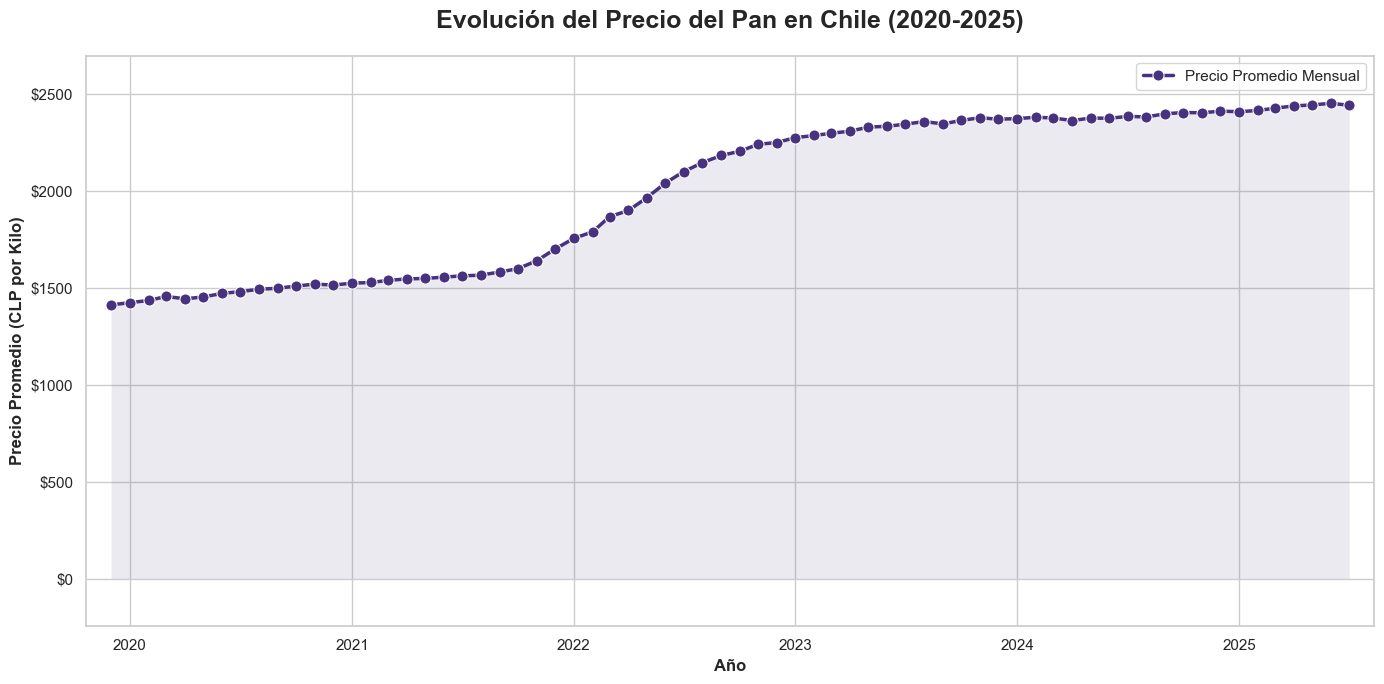

In [11]:
# Filtraremos por los tipos de pan más comunes
panes_comunes = ['Marraqueta', 'Hallulla']
df_pan = df_limpio[df_limpio['producto'].str.contains('|'.join(panes_comunes), case=False)].copy()

# Ponemos la fecha como índice
df_pan.set_index('fecha_inicio', inplace=True)

# Agrupamos los datos por mes y calculamos el precio promedio
precio_mensual_pan = df_pan['precio_promedio'].resample('MS').mean()

# --- Creación de la Visualización (sin cambios) ---
sns.set_theme(style="whitegrid", palette="viridis")
plt.figure(figsize=(14, 7))

ax = sns.lineplot(
    x=precio_mensual_pan.index,
    y=precio_mensual_pan.values,
    linewidth=2.5,
    marker='o',
    markersize=8,
    label='Precio Promedio Mensual'
)

ax.fill_between(precio_mensual_pan.index, precio_mensual_pan.values, alpha=0.1)

# --- Personalización y Estilo (sin cambios) ---
formatter = mticker.FormatStrFormatter('$%.0f')
ax.yaxis.set_major_formatter(formatter)

plt.title('Evolución del Precio del Pan en Chile (2020-2025)', fontsize=18, weight='bold', pad=20)
plt.xlabel('Año', fontsize=12, weight='bold')
plt.ylabel('Precio Promedio (CLP por Kilo)', fontsize=12, weight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.margins(x=0.02, y=0.1)
plt.legend()
plt.tight_layout()

# --- NUEVA SECCIÓN DE GUARDADO ---
# 1. Definimos el nombre de la carpeta de salida
output_dir = 'img'

# 3. Construimos la ruta completa del archivo
file_path = os.path.join(output_dir, "evolucion_precio_pan.png")

# 4. Guardamos el gráfico en la nueva ruta
plt.savefig(file_path, dpi=300)
print(f"Gráfico guardado en: '{file_path}'")

# Mostrar el gráfico
plt.show()

#### Comparativa de Inflación por Producto

No se encontraron datos para 'Aceite'.
Gráfico guardado en: 'img\comparacion_inflacion_productos.png'


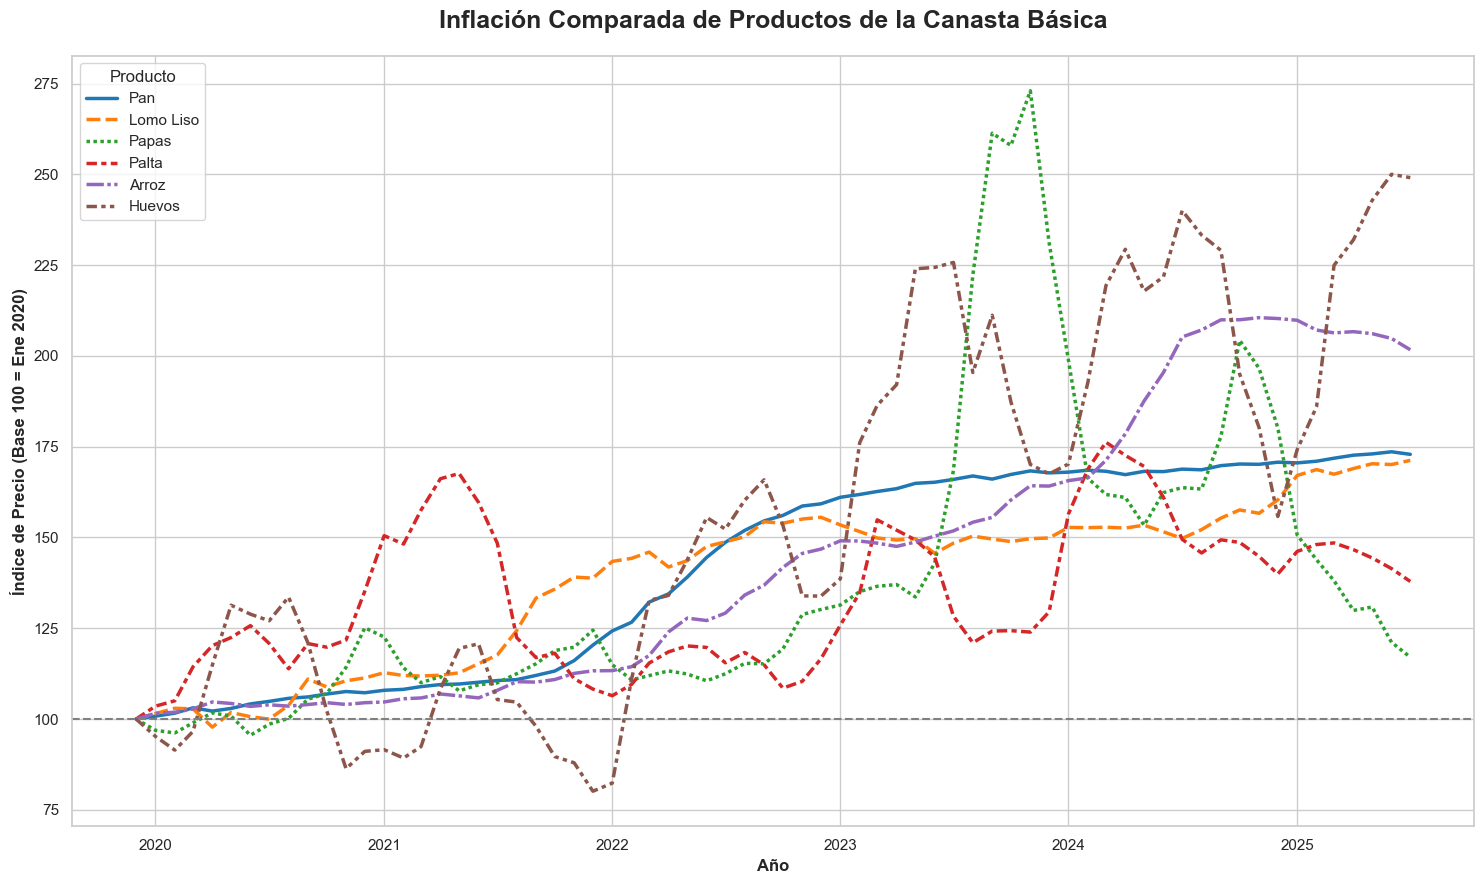

In [12]:
# --- 1. Preparación de Datos ---

# Lista de productos a graficar y sus palabras clave para búsqueda
productos_a_graficar = {
    'Pan': 'Marraqueta|Hallulla',
    'Lomo Liso': 'Lomo Liso',
    'Papas': 'Papa',
    'Palta': 'Palta',
    'Arroz': 'Arroz',
    'Aceite': 'Aceite Vegetal|Aceite Maravilla',
    'Huevos': 'Huevo'
}

# Lista para guardar las series de precios normalizadas de cada producto
series_normalizadas = []

# Iteramos sobre cada producto para procesar sus datos
for nombre, keyword in productos_a_graficar.items():
    
    # Filtramos por producto y nos aseguramos de que la unidad sea por kilo o unidad
    df_producto = df_limpio[
        df_limpio['producto'].str.contains(keyword, case=False) &
        df_limpio['unidad'].str.contains('kilo|unidad', case=False)
    ].copy()

    if df_producto.empty:
        print(f"No se encontraron datos para '{nombre}'.")
        continue

    # Calculamos el precio promedio mensual
    precio_mensual = df_producto.set_index('fecha_inicio')['precio_promedio'].resample('MS').mean()
    
    # Normalización: Dividimos todos los precios por el primer precio de la serie
    # y lo multiplicamos por 100. Usamos .bfill() para rellenar posibles nulos al inicio.
    primer_precio = precio_mensual.bfill().iloc[0]
    serie_normalizada = (precio_mensual / primer_precio) * 100
    
    # Le ponemos nombre a la serie y la añadimos a nuestra lista
    serie_normalizada.name = nombre
    series_normalizadas.append(serie_normalizada)

# Combinamos todas las series en un solo DataFrame
df_comparativo = pd.concat(series_normalizadas, axis=1)


# --- 2. Creación de la Visualización ---

sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 9))

# Usamos una paleta con suficientes colores distintos
ax = sns.lineplot(data=df_comparativo, palette="tab10", linewidth=2.5)


# --- 3. Personalización y Estilo ---

plt.axhline(100, color='gray', linestyle='--', linewidth=1.5) # Línea base del 100%
plt.title('Inflación Comparada de Productos de la Canasta Básica', fontsize=18, weight='bold', pad=20)
plt.xlabel('Año', fontsize=12, weight='bold')
plt.ylabel('Índice de Precio (Base 100 = Ene 2020)', fontsize=12, weight='bold')
plt.legend(title='Producto', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()


# --- Guardado en la carpeta 'img' ---
output_dir = 'img'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

file_path = os.path.join(output_dir, "comparacion_inflacion_productos.png")
plt.savefig(file_path, dpi=300)
print(f"Gráfico guardado en: '{file_path}'")

plt.show()

#### Distribución de Precios por Grupo de Alimentos

Gráfico guardado en: 'img\distribucion_precios_clasico.png'


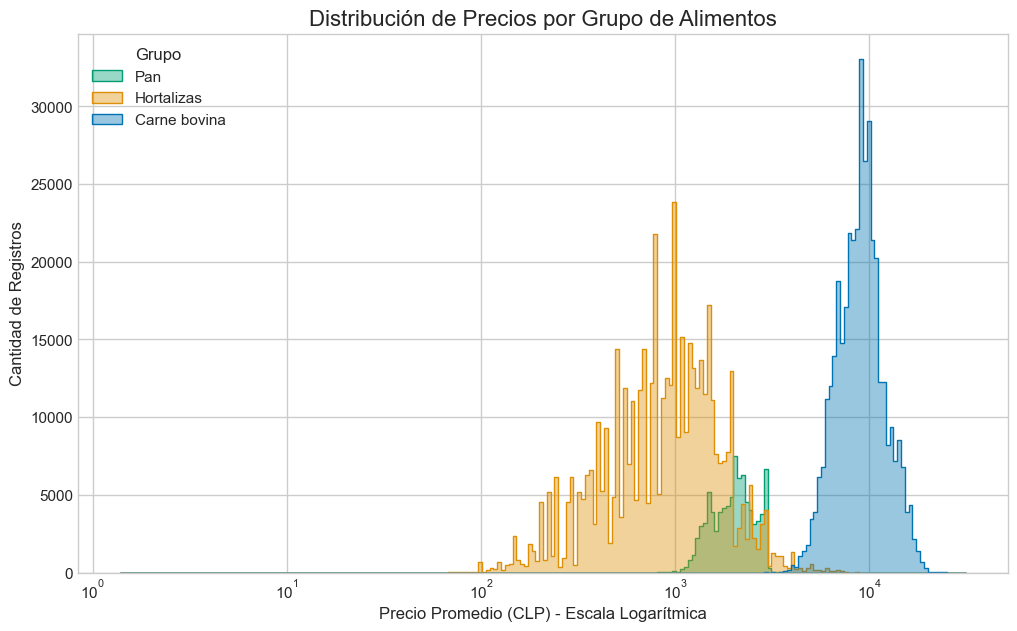

In [13]:
# Seleccionamos los grupos de alimentos que queremos comparar
grupos_a_comparar = ['Carne bovina', 'Hortalizas', 'Pan']
df_filtrado = df_limpio[df_limpio['grupo'].isin(grupos_a_comparar)]

# --- 2. Creación de la Visualización (Estilo Clásico) ---

# Usamos un estilo de gráfico clásico y definimos el tamaño
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))

# Creamos el histograma con Seaborn. 
# El parámetro 'hue' separa automáticamente por grupo.
# 'log_scale=True' en el eje x es clave para visualizar los diferentes rangos.
ax = sns.histplot(
    data=df_filtrado,
    x='precio_promedio',
    hue='grupo',
    log_scale=True,  # <-- ¡Importante para comparar rangos distintos!
    element='step',
    fill=True,
    alpha=0.4,
    palette='colorblind' # Una paleta de colores clásica y accesible
)

# --- 3. Personalización ---

plt.title('Distribución de Precios por Grupo de Alimentos', fontsize=16)
plt.xlabel('Precio Promedio (CLP) - Escala Logarítmica', fontsize=12)
plt.ylabel('Cantidad de Registros', fontsize=12)
plt.legend(title='Grupo', labels=['Pan', 'Hortalizas', 'Carne bovina']) # Ajustar etiquetas si es necesario

# --- Guardado en la carpeta 'img' ---
output_dir = 'img'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

file_path = os.path.join(output_dir, "distribucion_precios_clasico.png")
plt.savefig(file_path, dpi=300)
print(f"Gráfico guardado en: '{file_path}'")

plt.show()

#### Comparativa de Precios con Box Plot
Crearemos un box plot para comparar las distribuciones de precios de los principales grupos de alimentos. Al igual que con el histograma, usaremos una escala logarítmica en el eje de precios para poder comparar grupos con rangos muy diferentes (como carnes y hortalizas) de forma clara.

Este gráfico te permitirá responder preguntas como:

¿Qué categoría tiene el rango de precios más amplio?

¿Cuál es el precio mediano (el valor del medio) para cada grupo?

¿Existen muchos precios anormalmente altos (outliers) en alguna categoría?

Gráfico guardado en: 'img\comparacion_boxplot_grupos.png'


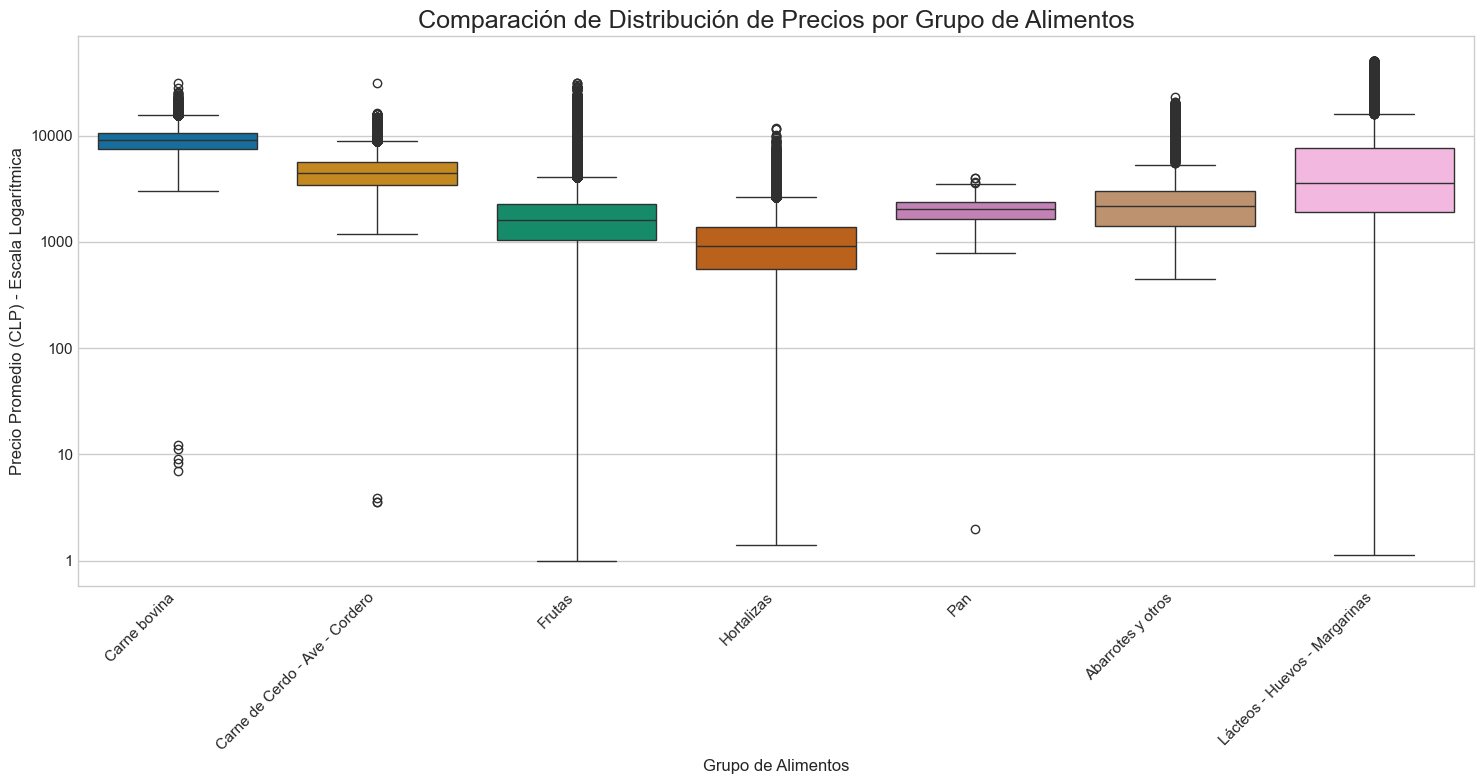

In [14]:
# Usamos un estilo de gráfico clásico
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15, 8))

# Creamos el box plot con Seaborn
# El eje 'y' será el precio, y el eje 'x' las categorías que comparamos.
ax = sns.boxplot(
    data=df_limpio,
    x='grupo',
    y='precio_promedio',
    palette='colorblind' # Usamos una paleta de colores clásica y accesible
)

# ¡Importante! Aplicamos la escala logarítmica al eje de precios (Y)
plt.yscale('log')

# --- 3. Personalización ---

# Formateamos el eje Y para que los números sean más legibles
# Como es una escala logarítmica, los 'ticks' se manejan de forma diferente
from matplotlib.ticker import ScalarFormatter
ax.yaxis.set_major_formatter(ScalarFormatter())


plt.title('Comparación de Distribución de Precios por Grupo de Alimentos', fontsize=18)
plt.xlabel('Grupo de Alimentos', fontsize=12)
plt.ylabel('Precio Promedio (CLP) - Escala Logarítmica', fontsize=12)

# Rotamos las etiquetas del eje X para que no se superpongan
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# --- Guardado en la carpeta 'img' ---
output_dir = 'img'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

file_path = os.path.join(output_dir, "comparacion_boxplot_grupos.png")
plt.savefig(file_path, dpi=300)
print(f"Gráfico guardado en: '{file_path}'")

plt.show()

#### Inflación acumuluada por Region

Gráfico guardado en: 'img\ranking_inflacion_regional.png'


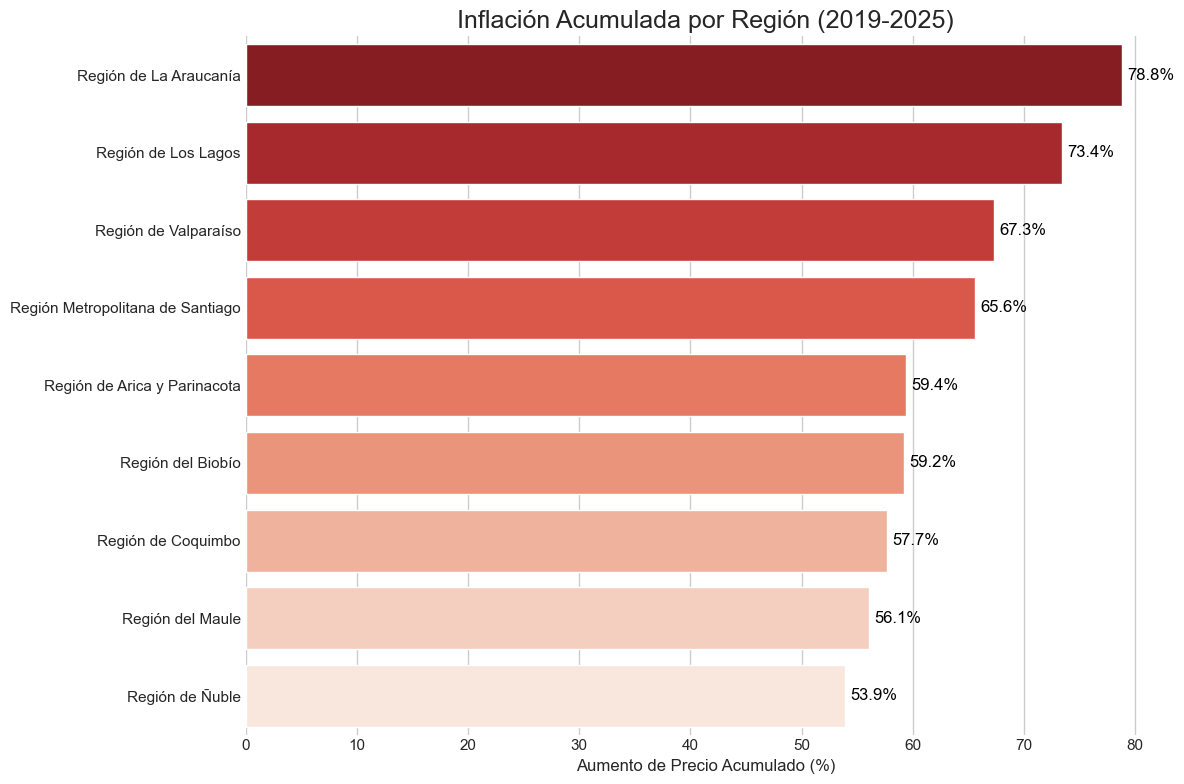

In [15]:
# Definimos nuestros períodos de inicio y fin
# Usamos trimestres para tener un promedio más estable
fecha_inicio_periodo = df_limpio['fecha_inicio'].min()
fecha_fin_periodo = df_limpio['fecha_inicio'].max()

# Periodo inicial: Primeros 3 meses de datos
periodo_inicial_fin = fecha_inicio_periodo + pd.DateOffset(months=3)
df_inicial = df_limpio[df_limpio['fecha_inicio'] <= periodo_inicial_fin]

# Periodo final: Últimos 3 meses de datos
periodo_final_inicio = fecha_fin_periodo - pd.DateOffset(months=3)
df_final = df_limpio[df_limpio['fecha_inicio'] >= periodo_final_inicio]

# Calculamos el precio promedio por región para cada período
precios_iniciales = df_inicial.groupby('region')['precio_promedio'].mean()
precios_finales = df_final.groupby('region')['precio_promedio'].mean()

# Calculamos la inflación como el cambio porcentual
inflacion_regional = ((precios_finales - precios_iniciales) / precios_iniciales) * 100

# Ordenamos los resultados de mayor a menor inflación
inflacion_regional_sorted = inflacion_regional.sort_values(ascending=False)


# --- 2. Creación de la Visualización ---

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

# Usamos una paleta secuencial para denotar la magnitud
ax = sns.barplot(
    x=inflacion_regional_sorted.values,
    y=inflacion_regional_sorted.index,
    palette='Reds_r' # Paleta clásica para valores altos/bajos
)

# --- 3. Personalización y Estilo ---

# Añadimos los porcentajes al final de cada barra
for i, v in enumerate(inflacion_regional_sorted.values):
    ax.text(v + 0.5, i, f'{v:.1f}%', color='black', va='center')

plt.title(f'Inflación Acumulada por Región ({fecha_inicio_periodo.year}-{fecha_fin_periodo.year})', fontsize=18)
plt.xlabel('Aumento de Precio Acumulado (%)', fontsize=12)
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.tight_layout()

# --- Guardado en la carpeta 'img' ---
output_dir = 'img'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

file_path = os.path.join(output_dir, "ranking_inflacion_regional.png")
plt.savefig(file_path, dpi=300)
print(f"Gráfico guardado en: '{file_path}'")

plt.show()

#### Análisis Estacional de Productos en Verano e Invierno


--- Top 10 Productos con Mayor Aumento en Invierno ---
estacion                                         Invierno       Verano  \
producto                                                                 
Frambuesa|Sin especificar|Segunda            31286.000000  3006.488562   
Frambuesa|Sin especificar|Primera            22317.025641  4980.633724   
Arándano (blue)|Sin especificar|Segunda      13570.508333  3210.966954   
Arándano (blue)|Sin especificar|Primera      17410.825871  5066.631137   
Arándano (blue) | Sin especificar | Primera  12668.333333  4961.226061   
Huevo de campo - Segunda                     11475.000000  4775.000000   
Frambuesa | Sin especificar | Primera        14014.833333  6684.132238   
Huevo de campo - Primera                      7562.117647  3821.666667   
Frutilla | Sin especificar | Segunda          2822.673913  1427.374481   
Poroto granado|Sin especificar|Segunda        2645.000000  1386.041779   

estacion                                     aumento_inv

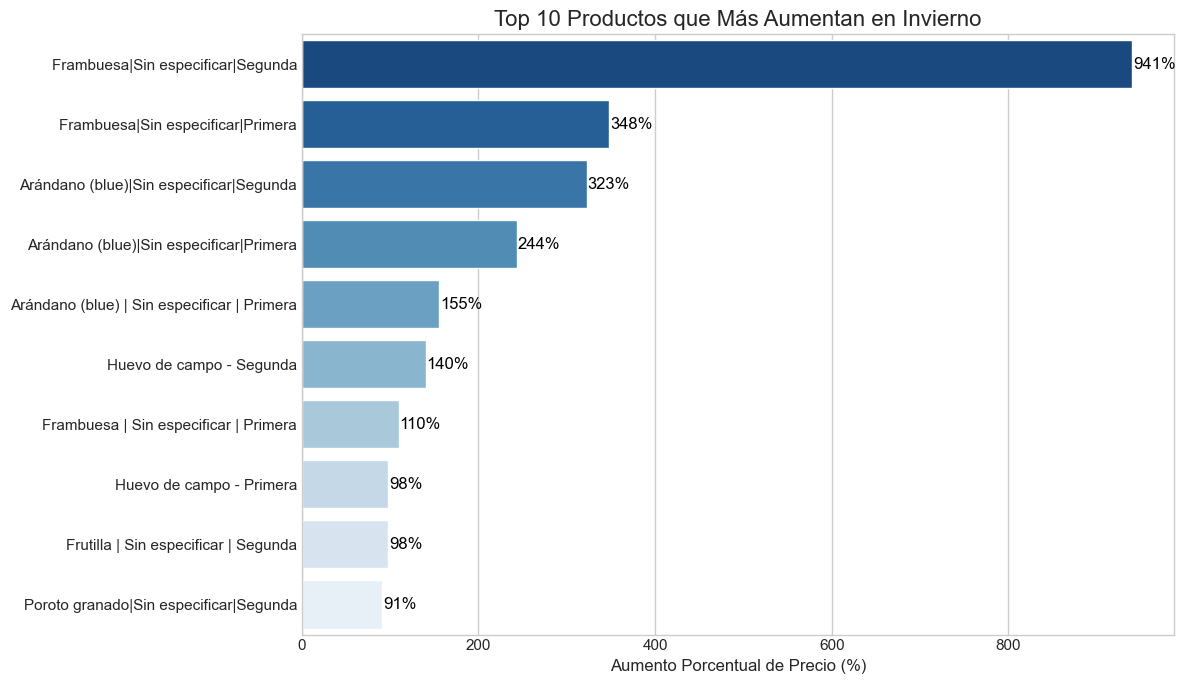

Gráfico guardado en: 'img\top_aumentos_verano.png'


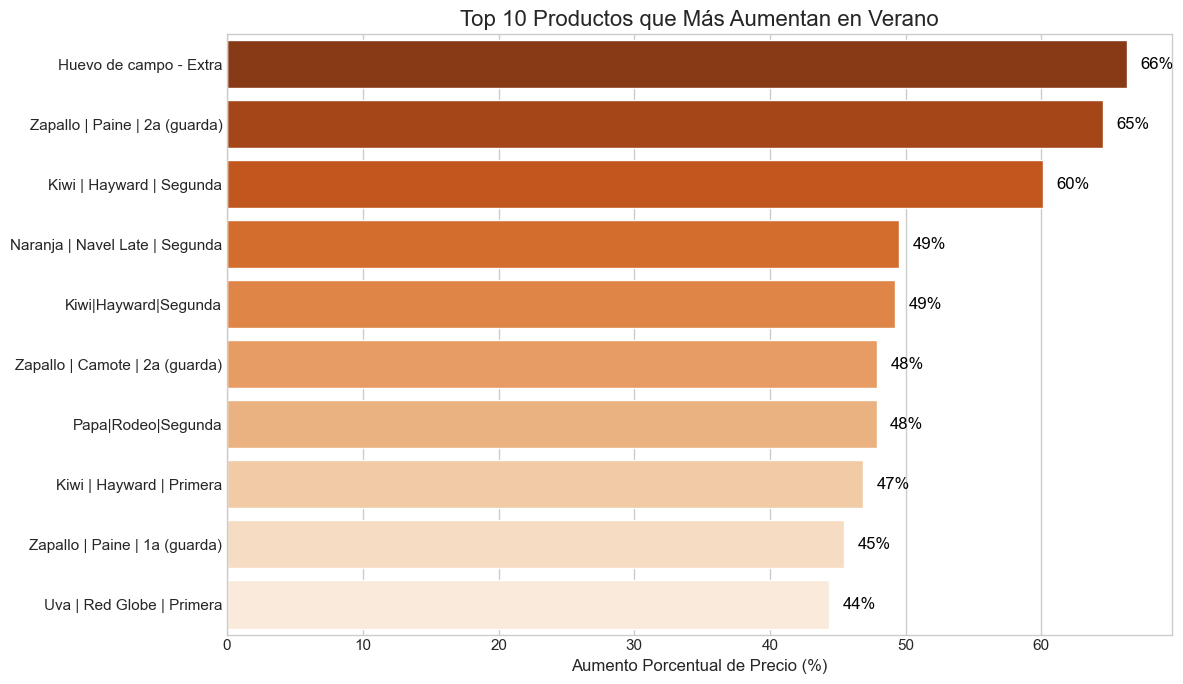

In [16]:
# Creamos una columna 'estacion' basada en el mes
def get_estacion(mes):
    if mes in [12, 1, 2]:
        return 'Verano'
    elif mes in [6, 7, 8]:
        return 'Invierno'
    else:
        return 'Otra'

df_limpio['estacion'] = df_limpio['mes'].apply(get_estacion)

# Filtramos para quedarnos solo con los datos de verano e invierno
df_estacional = df_limpio[df_limpio['estacion'].isin(['Verano', 'Invierno'])].copy()

# Calculamos el precio promedio por producto y estación
precios_estacionales = df_estacional.groupby(['producto', 'estacion'])['precio_promedio'].mean().unstack()

# Eliminamos productos que no tengan datos en AMBAS estaciones para una comparación justa
precios_estacionales.dropna(inplace=True)

# Calculamos la diferencia porcentual
precios_estacionales['aumento_invierno_%'] = ((precios_estacionales['Invierno'] - precios_estacionales['Verano']) / precios_estacionales['Verano']) * 100

# --- 2. Identificar Top Productos ---

# Productos que más suben en Invierno
top_10_invierno = precios_estacionales.sort_values(by='aumento_invierno_%', ascending=False).head(10)
print("--- Top 10 Productos con Mayor Aumento en Invierno ---")
print(top_10_invierno)

# Productos que más suben en Verano (los que tienen el mayor aumento negativo en invierno)
top_10_verano = precios_estacionales.sort_values(by='aumento_invierno_%', ascending=True).head(10)
# Convertimos el aumento a positivo para el gráfico de verano
top_10_verano['aumento_verano_%'] = top_10_verano['aumento_invierno_%'] * -1
print("\n--- Top 10 Productos con Mayor Aumento en Verano ---")
print(top_10_verano)


# --- 3. Creación de Visualizaciones ---

plt.style.use('seaborn-v0_8-whitegrid')

# Gráfico para productos de Invierno
plt.figure(figsize=(12, 7))
ax1 = sns.barplot(x=top_10_invierno['aumento_invierno_%'], y=top_10_invierno.index, palette='Blues_r')
ax1.set_title('Top 10 Productos que Más Aumentan en Invierno', fontsize=16)
ax1.set_xlabel('Aumento Porcentual de Precio (%)', fontsize=12)
ax1.set_ylabel('')
for i, v in enumerate(top_10_invierno['aumento_invierno_%']):
    ax1.text(v + 1, i, f'{v:.0f}%', color='black', va='center')
plt.tight_layout()
file_path_invierno = os.path.join('img', 'top_aumentos_invierno.png')
plt.savefig(file_path_invierno, dpi=300)
print(f"\nGráfico guardado en: '{file_path_invierno}'")
plt.show()


# Gráfico para productos de Verano
plt.figure(figsize=(12, 7))
ax2 = sns.barplot(x=top_10_verano['aumento_verano_%'], y=top_10_verano.index, palette='Oranges_r')
ax2.set_title('Top 10 Productos que Más Aumentan en Verano', fontsize=16)
ax2.set_xlabel('Aumento Porcentual de Precio (%)', fontsize=12)
ax2.set_ylabel('')
for i, v in enumerate(top_10_verano['aumento_verano_%']):
    ax2.text(v + 1, i, f'{v:.0f}%', color='black', va='center')
plt.tight_layout()
file_path_verano = os.path.join('img', 'top_aumentos_verano.png')
plt.savefig(file_path_verano, dpi=300)
print(f"Gráfico guardado en: '{file_path_verano}'")
plt.show()

#### Análisis de Volatilidad de Precios 📈

Para medir la volatilidad de una forma justa, no podemos usar solo la desviación estándar, ya que un producto caro (como la carne) naturalmente tendrá una desviación más alta que uno barato (como las papas).

Usaremos el Coeficiente de Variación (CV), que es una medida de volatilidad relativa y se calcula así:

CV = (Desviación Estándar del Precio / Precio Promedio) * 100

Un CV alto significa alta volatilidad, y un CV bajo indica precios muy estables.

Este código calculará el CV para cada producto y luego generará dos gráficos de barras: el Top 15 de los productos más volátiles y el Top 15 de los más estables.

Gráfico guardado en: 'img\top_productos_volatiles.png'


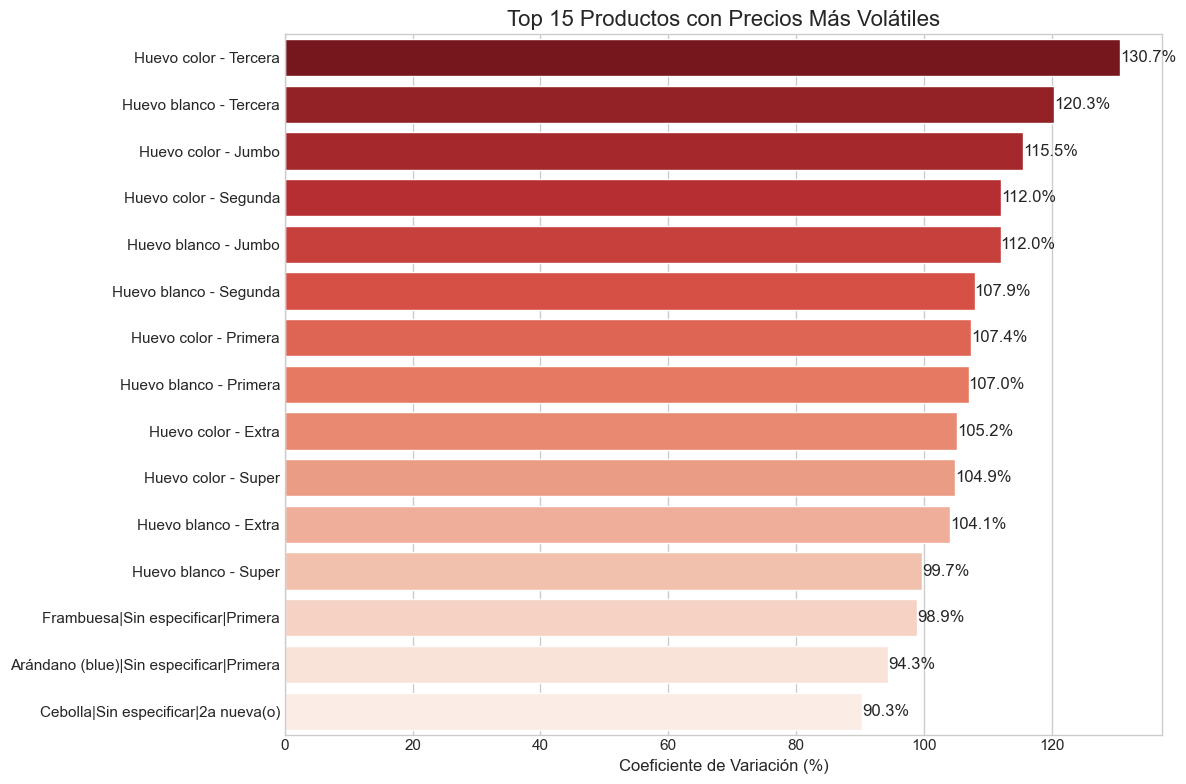

Gráfico guardado en: 'img\top_productos_estables.png'


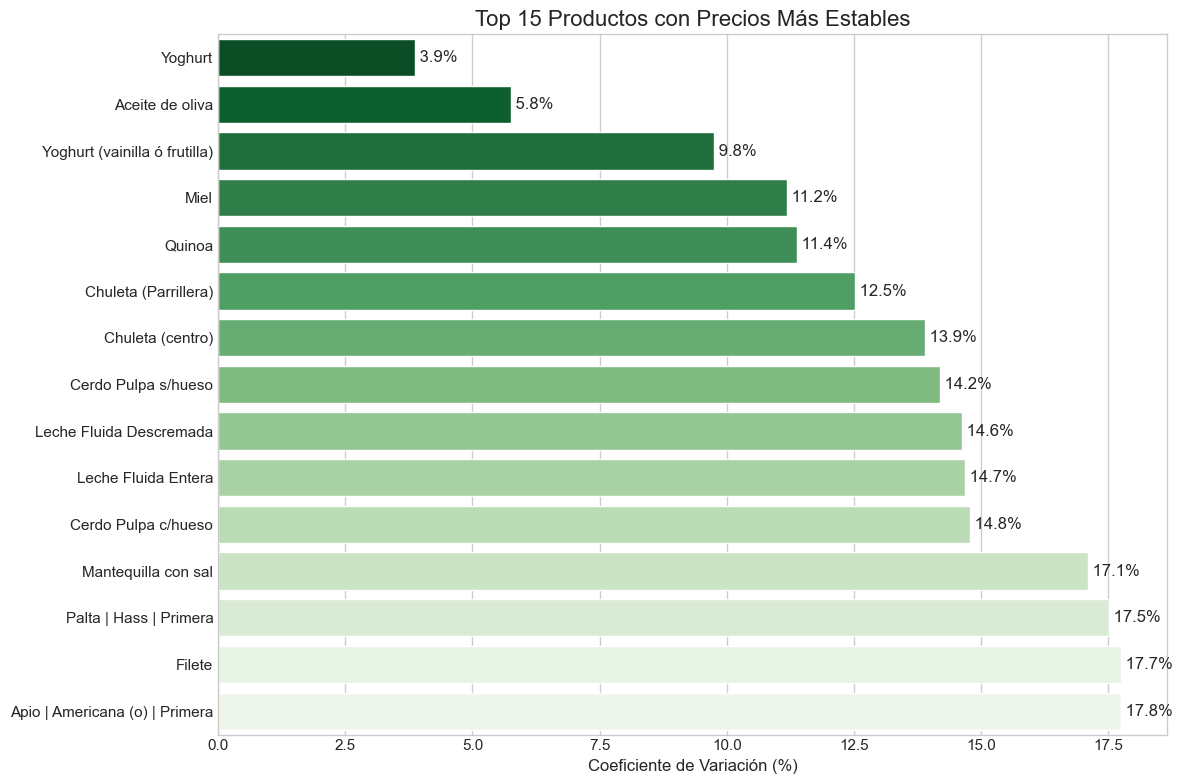

In [17]:
# Agrupamos por producto y calculamos la media, la desviación estándar y el conteo de registros
volatilidad_productos = df_limpio.groupby('producto')['precio_promedio'].agg(['mean', 'std', 'count']).reset_index()

# Filtramos productos con pocos registros para un cálculo más robusto (ej. más de 1000 registros)
volatilidad_productos = volatilidad_productos[volatilidad_productos['count'] > 1000]

# Calculamos el Coeficiente de Variación (CV) en porcentaje
volatilidad_productos['coef_variacion_%'] = (volatilidad_productos['std'] / volatilidad_productos['mean']) * 100

# --- 2. Identificar Top Productos ---

# Top 15 más volátiles (mayor CV)
top_15_volatiles = volatilidad_productos.sort_values(by='coef_variacion_%', ascending=False).head(15)

# Top 15 más estables (menor CV)
top_15_estables = volatilidad_productos.sort_values(by='coef_variacion_%', ascending=True).head(15)


# --- 3. Visualización ---

plt.style.use('seaborn-v0_8-whitegrid')

# Gráfico para productos MÁS VOLÁTILES
plt.figure(figsize=(12, 8))
ax1 = sns.barplot(x=top_15_volatiles['coef_variacion_%'], y=top_15_volatiles['producto'], palette='Reds_r')
ax1.set_title('Top 15 Productos con Precios Más Volátiles', fontsize=16)
ax1.set_xlabel('Coeficiente de Variación (%)', fontsize=12)
ax1.set_ylabel('')
for i, v in enumerate(top_15_volatiles['coef_variacion_%']):
    ax1.text(v, i, f'{v:.1f}%', va='center')
plt.tight_layout()
file_path_volatil = os.path.join('img', 'top_productos_volatiles.png')
plt.savefig(file_path_volatil, dpi=300)
print(f"Gráfico guardado en: '{file_path_volatil}'")
plt.show()

# Gráfico para productos MÁS ESTABLES
plt.figure(figsize=(12, 8))
ax2 = sns.barplot(x=top_15_estables['coef_variacion_%'], y=top_15_estables['producto'], palette='Greens_r')
ax2.set_title('Top 15 Productos con Precios Más Estables', fontsize=16)
ax2.set_xlabel('Coeficiente de Variación (%)', fontsize=12)
ax2.set_ylabel('')
for i, v in enumerate(top_15_estables['coef_variacion_%']):
    ax2.text(v, i, f' {v:.1f}%', va='center')
plt.tight_layout()
file_path_estable = os.path.join('img', 'top_productos_estables.png')
plt.savefig(file_path_estable, dpi=300)
print(f"Gráfico guardado en: '{file_path_estable}'")
plt.show()

#### Comparativa de Canales en el Tiempo 

Hicimos una comparación estática entre supermercados y ferias, pero ¿esa diferencia de precio se ha mantenido constante a lo largo de los años?

Pregunta a responder: Para el grupo de "Hortalizas", ¿la diferencia de precio entre "Feria libre" y "Supermercado" ha aumentado o disminuido desde 2020?

Método: Calcularíamos el precio promedio mensual para el grupo "Hortalizas" por separado para cada tipo de local ("Feria libre" y "Supermercado").

Visualización: Un gráfico con dos líneas de tiempo, una para cada canal. Esto nos permitiría ver si la brecha de precios se agranda, se achica o si incluso se han cruzado en algún momento.

Gráfico guardado en: 'img\comparacion_canales_tiempo.png'


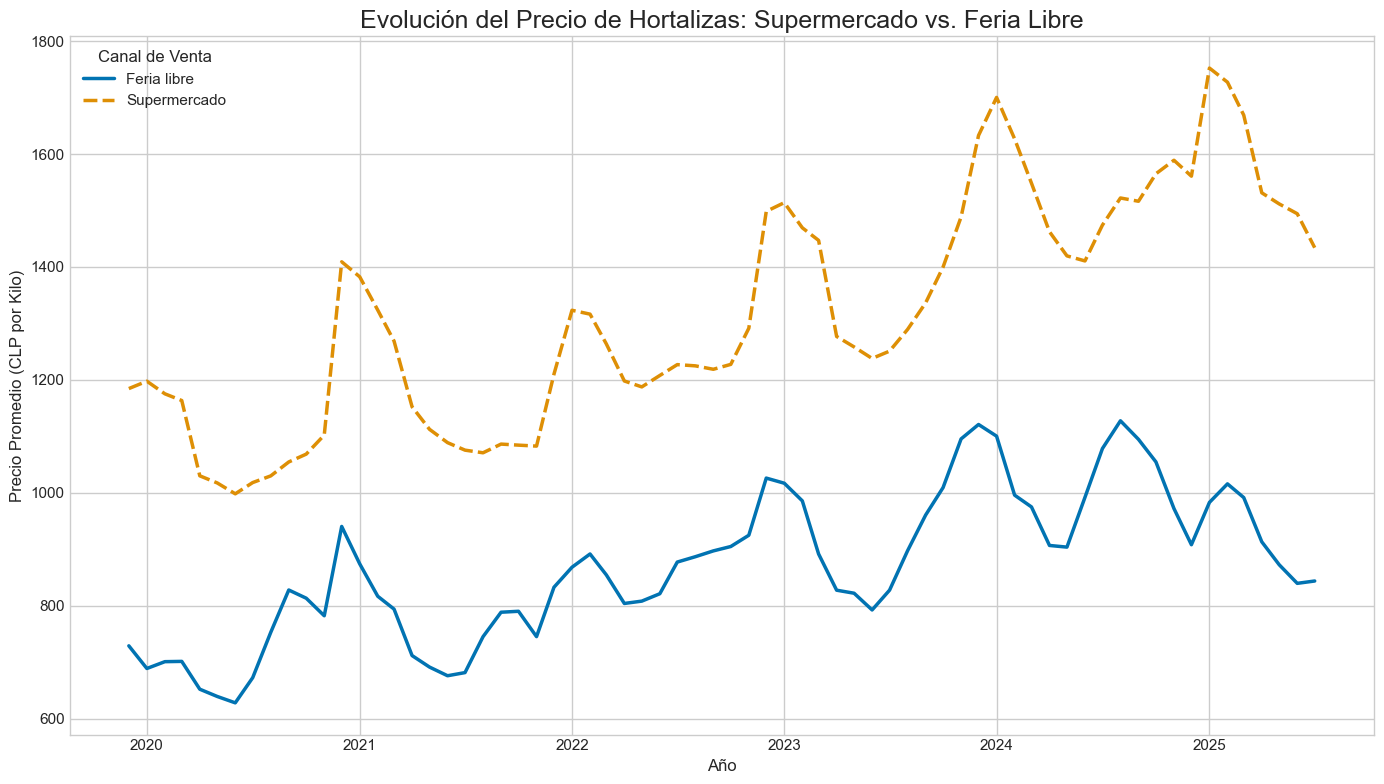

In [18]:
# Filtramos por el grupo 'Hortalizas' y los dos canales que nos interesan
canales_a_comparar = ['Supermercado', 'Feria libre']
df_canales = df_limpio[
    (df_limpio['grupo'] == 'Hortalizas') &
    (df_limpio['tipo_de_punto_monitoreo'].isin(canales_a_comparar))
].copy()

# Creamos una tabla pivote para tener el precio promedio mensual para cada canal
precios_por_canal_tiempo = df_canales.pivot_table(
    values='precio_promedio',
    index=pd.Grouper(key='fecha_inicio', freq='MS'), # Agrupamos por inicio de mes
    columns='tipo_de_punto_monitoreo',
    aggfunc='mean'
)

# --- 2. Creación de la Visualización ---

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))

# Graficamos la evolución de precios para ambos canales
ax = sns.lineplot(
    data=precios_por_canal_tiempo,
    linewidth=2.5,
    palette='colorblind' # Usamos una paleta clásica
)

# --- 3. Personalización y Estilo ---

plt.title('Evolución del Precio de Hortalizas: Supermercado vs. Feria Libre', fontsize=18)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Precio Promedio (CLP por Kilo)', fontsize=12)

# Mejoramos la leyenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Canal de Venta', fontsize=11)

plt.tight_layout()

# --- Guardado en la carpeta 'img' ---
output_dir = 'img'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

file_path = os.path.join(output_dir, "comparacion_canales_tiempo.png")
plt.savefig(file_path, dpi=300)
print(f"Gráfico guardado en: '{file_path}'")

plt.show()

--- generando comparativa de canales para: Frutas ---
Gráfico guardado en: 'img\comparacion_canales_frutas.png'


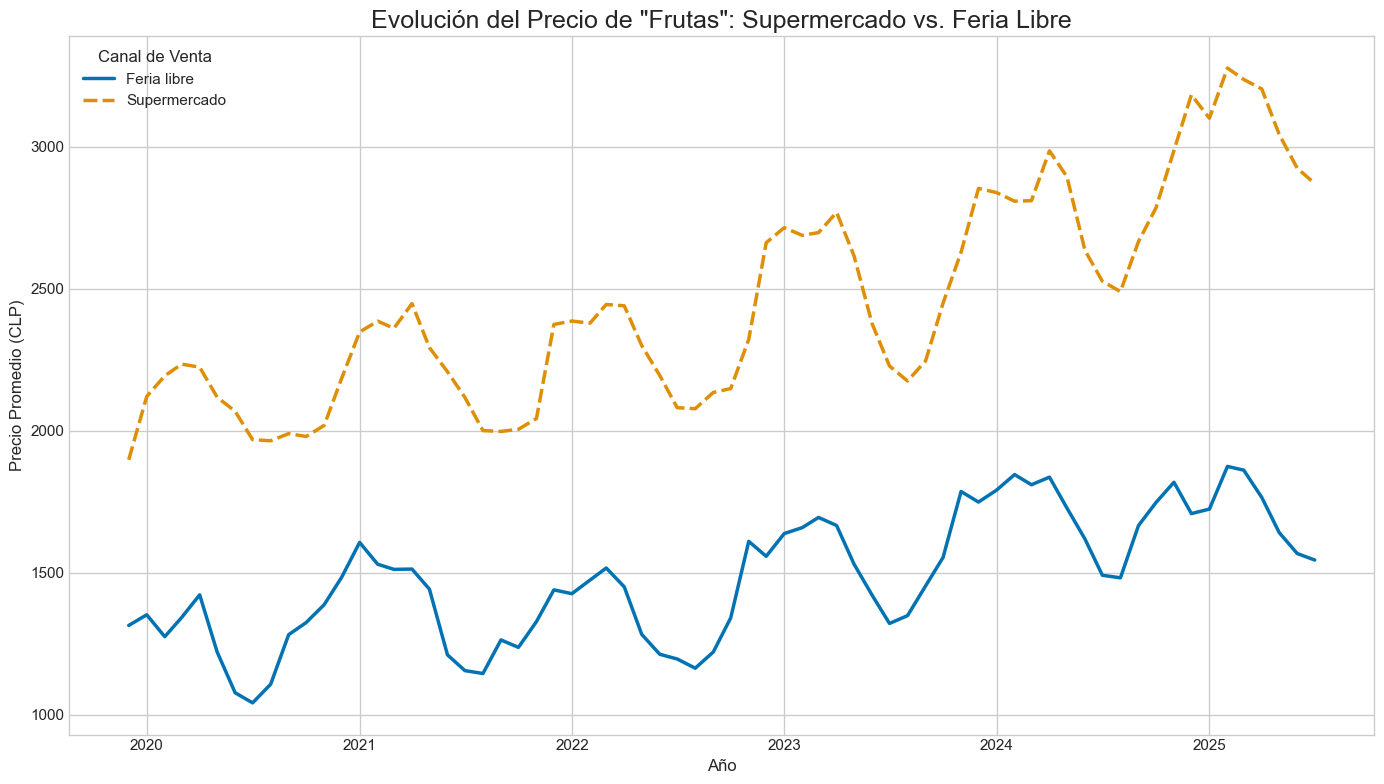

--- generando comparativa de canales para: Lácteos - Huevos - Margarinas ---
Gráfico guardado en: 'img\comparacion_canales_lácteos___huevos___margarinas.png'


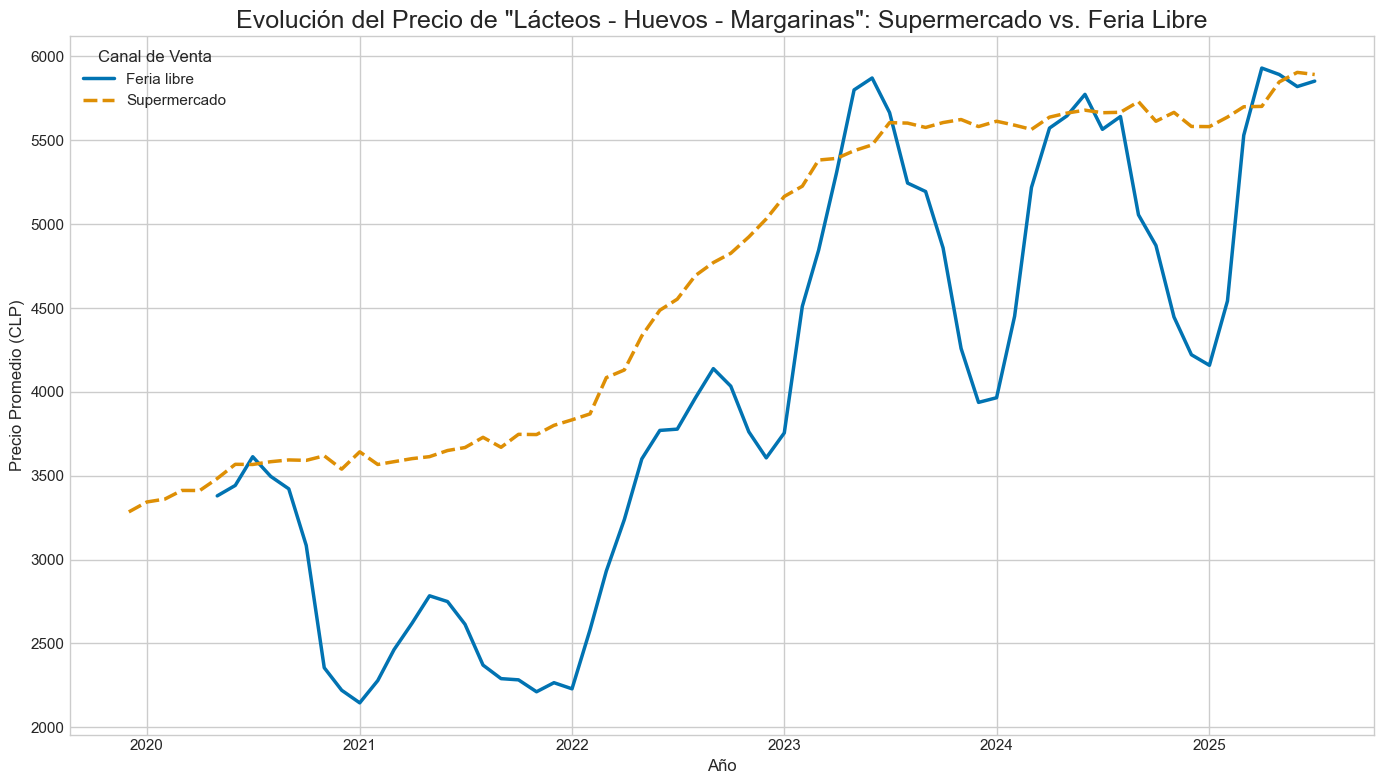

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Asumimos que tu DataFrame final se llama df_limpio

# --- 1. Definición de la Función Reutilizable ---

def plot_comparativa_canales(grupo_alimento, df):
    """
    Genera un gráfico de líneas comparando los precios de Supermercado vs. Feria Libre
    para un grupo de alimentos específico a lo largo del tiempo.
    
    Args:
        grupo_alimento (str): El nombre del grupo a analizar.
        df (pd.DataFrame): El DataFrame limpio.
    """
    print(f"--- generando comparativa de canales para: {grupo_alimento} ---")

    # --- Preparación de Datos ---
    canales = ['Supermercado', 'Feria libre']
    df_filtrado = df[
        (df['grupo'] == grupo_alimento) &
        (df['tipo_de_punto_monitoreo'].isin(canales))
    ].copy()

    if df_filtrado.empty:
        print(f"No se encontraron suficientes datos para '{grupo_alimento}' en Supermercados y Ferias.")
        return

    pivot_precios = df_filtrado.pivot_table(
        values='precio_promedio',
        index=pd.Grouper(key='fecha_inicio', freq='MS'),
        columns='tipo_de_punto_monitoreo',
        aggfunc='mean'
    )
    
    # Nos aseguramos de tener datos para ambos canales antes de graficar
    if pivot_precios.shape[1] < 2:
        print(f"El grupo '{grupo_alimento}' no tiene datos en ambos canales (Supermercado y Feria) para comparar.")
        return

    # --- Creación de la Visualización ---
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(14, 8))
    ax = sns.lineplot(data=pivot_precios, linewidth=2.5, palette='colorblind')

    # --- Personalización ---
    plt.title(f'Evolución del Precio de "{grupo_alimento}": Supermercado vs. Feria Libre', fontsize=18)
    plt.xlabel('Año', fontsize=12)
    plt.ylabel('Precio Promedio (CLP)', fontsize=12)
    plt.legend(title='Canal de Venta', fontsize=11)
    plt.tight_layout()

    # --- Guardado ---
    output_dir = 'img'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    file_name = f"comparacion_canales_{grupo_alimento.lower().replace(' ', '_').replace('-', '_')}.png"
    file_path = os.path.join(output_dir, file_name)
    plt.savefig(file_path, dpi=300)
    print(f"Gráfico guardado en: '{file_path}'")
    plt.show()

# --- 2. Llamada a la Función para Nuevas Categorías ---

# Ahora podemos generar los gráficos que queramos fácilmente:
plot_comparativa_canales('Frutas', df_limpio)
plot_comparativa_canales('Lácteos - Huevos - Margarinas', df_limpio)

#### Margen de Precios por Canal 
Analizaremos la diferencia entre el precio máximo y mínimo de un producto en un mismo punto de venta y semana. Un "spread" o margen alto puede significar una gran variedad de calidades (ej. tomates de primera vs. de segunda) o simplemente una mayor dispersión de precios.

Para una comparación justa, mediremos este spread como un porcentaje del precio promedio.

Este código:

Calculará el "spread porcentual" para cada registro.

Generará un box plot para comparar la distribución de estos márgenes entre los diferentes tipos de locales (Supermercado, Feria, etc.).

Gráfico guardado en: 'img\comparacion_spread_canal.png'


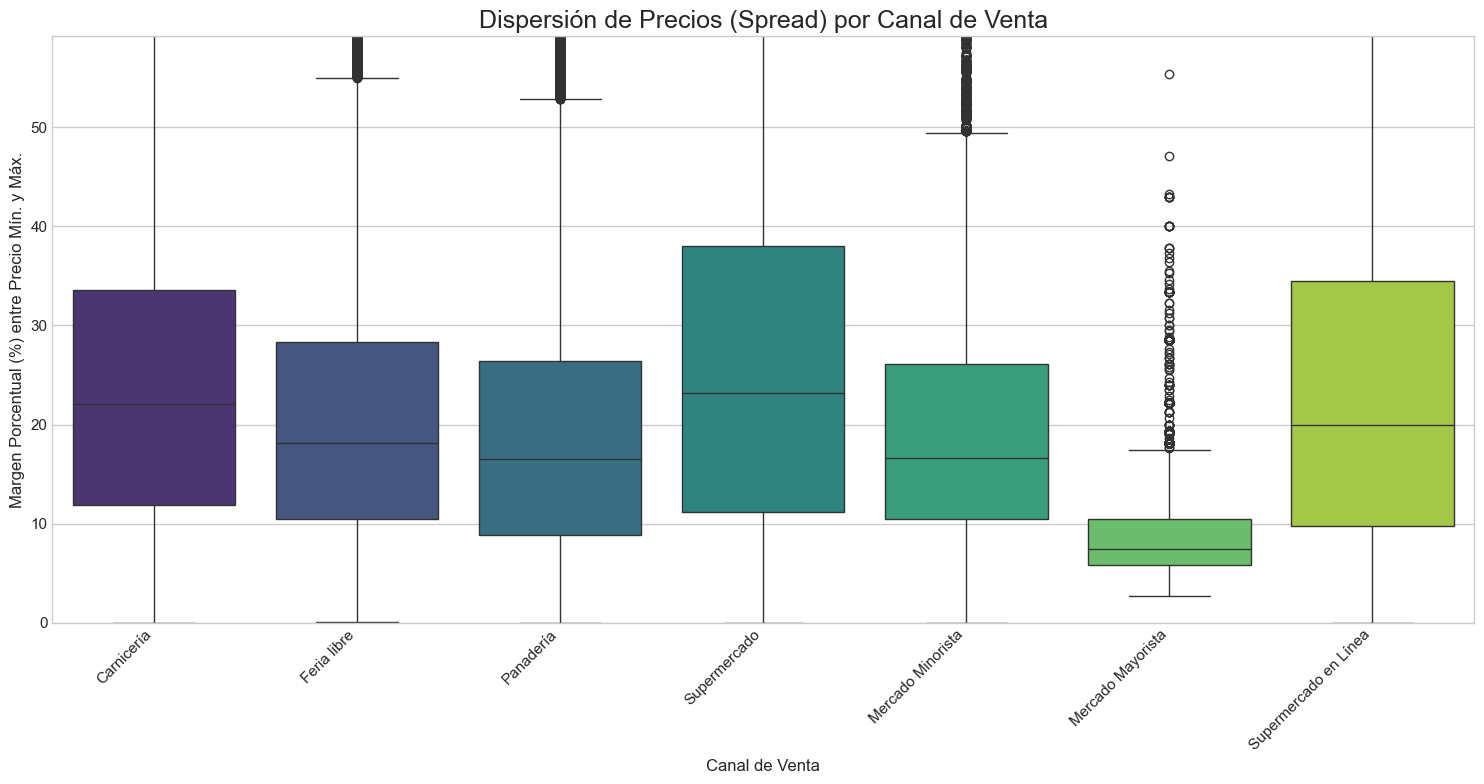

In [20]:
# Calculamos el spread absoluto y porcentual
df_limpio['spread_abs'] = df_limpio['precio_maximo'] - df_limpio['precio_minimo']
df_limpio['spread_%'] = (df_limpio['spread_abs'] / df_limpio['precio_promedio']) * 100

# Reemplazamos valores infinitos (si el precio promedio fuera 0) con Nulos y eliminamos nulos/negativos
df_limpio.replace([np.inf, -np.inf], np.nan, inplace=True)
df_spread = df_limpio[df_limpio['spread_%'] > 0].dropna(subset=['spread_%'])


# --- 2. Creación de la Visualización ---

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15, 8))

# Creamos el box plot para comparar las distribuciones del spread
ax = sns.boxplot(
    data=df_spread,
    x='tipo_de_punto_monitoreo',
    y='spread_%',
    palette='viridis'
)

# --- 3. Personalización y Estilo ---

plt.title('Dispersión de Precios (Spread) por Canal de Venta', fontsize=18)
plt.xlabel('Canal de Venta', fontsize=12)
plt.ylabel('Margen Porcentual (%) entre Precio Mín. y Máx.', fontsize=12)

# Rotamos las etiquetas del eje X para que no se superpongan
plt.xticks(rotation=45, ha='right')

# Ajustamos el límite del eje Y para una mejor visualización de las cajas,
# excluyendo outliers muy extremos que pueden aplastar el gráfico.
plt.ylim(0, df_spread['spread_%'].quantile(0.95)) # Mostramos hasta el percentil 95

plt.tight_layout()

# --- Guardado en la carpeta 'img' ---
output_dir = 'img'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

file_path = os.path.join(output_dir, "comparacion_spread_canal.png")
plt.savefig(file_path, dpi=300)
print(f"Gráfico guardado en: '{file_path}'")

plt.show()

### Eliminamos las columnas que no vamos a necesitar en Tableau

In [21]:
# Eliminar las columnas fecha_inicio fecha_termino spread_abs spread_% y id_region  
df_limpio.drop(columns=['fecha_inicio', 'fecha_termino', 'spread_abs', 'spread_%'], inplace=True)

In [22]:
# Eliminamos columna id_region
df_limpio.drop(columns=['id_region'], inplace=True)

In [23]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858363 entries, 0 to 1858362
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   anio                     int64  
 1   mes                      int64  
 2   semana                   int64  
 3   region                   object 
 4   sector                   object 
 5   tipo_de_punto_monitoreo  object 
 6   grupo                    object 
 7   producto                 object 
 8   unidad                   object 
 9   precio_minimo            int64  
 10  precio_maximo            int64  
 11  precio_promedio          float64
 12  estacion                 object 
dtypes: float64(1), int64(5), object(7)
memory usage: 184.3+ MB


#### Guardamos el Dataframe

In [24]:
# 1. Definimos la carpeta y el nombre del archivo de salida
output_dir = 'data'
output_filename = 'precios_consumidor_limpio_2020-2025.csv'

# 2. Nos aseguramos de que la carpeta de destino exista
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Carpeta '{output_dir}' creada.")

# 3. Construimos la ruta completa del archivo
file_path = os.path.join(output_dir, output_filename)

# 4. Guardamos el DataFrame en formato CSV
# Usamos index=False para no guardar el índice del DataFrame como una columna
df_limpio.to_csv(file_path, index=False)

print(f"\n¡DataFrame guardado con éxito!")
print(f"Ruta del archivo: {file_path}")


¡DataFrame guardado con éxito!
Ruta del archivo: data\precios_consumidor_limpio_2020-2025.csv
